## Annotating Plots

### New York Stock Exchange (Continued)

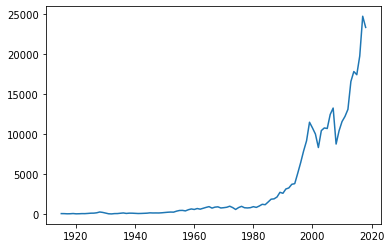

In [2]:
# I'm going to follow up Nia's work with a bit of a discussion of how to annotate plots, which is useful not
# only for exploring data but for communicating your results to others, whether it be in presentations,
# papers, or other media. Let's continue with our previous example looking at the Dow Jones Industrial
# Average's closing values over the past century or so. Just to refresh your memory, I'll go ahead and re-plot
# the data. 
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# I'm just going to copy and pase our closing values
years = np.arange(1915, 2019, 1) 
closing_values = [99.15, 95.00, 74.38, 82.20, 107.23, 71.95, 80.80, 98.17, 95.52, 120.51, 151.08, 157.20, 
                  200.70, 300.00, 248.48, 164.58, 77.90, 59.93, 99.90, 104.04, 144.13, 179.90, 120.85, 
                  154.76, 150.24, 131.13, 110.96, 119.40, 135.89, 152.32, 192.91, 177.20, 181.16, 177.30,
                  200.13, 235.41, 269.23, 291.90, 280.90, 404.39, 488.40, 499.47, 435.69, 583.65, 679.36, 
                  615.89, 731.14, 652.10, 762.95, 874.13, 969.26, 785.69, 905.11, 943.75, 800.36, 838.92, 
                  890.20, 1020.02, 850.86, 616.24, 852.41, 1004.65, 831.17, 805.01, 838.74, 963.99, 875.00, 
                  1046.54, 1258.64, 1211.57, 1546.67, 1895.95, 1938.83, 2168.57, 2753.20, 2633.66, 3168.83, 
                  3301.11, 3754.09, 3834.44, 5117.12, 6448.27, 7908.30, 9181.43, 11497.12, 10787.99, 10021.57, 
                  8341.63, 10453.92, 10783.01, 10717.50, 12463.15, 13264.82, 8776.39, 10428.05, 11577.51, 
                  12217.56, 13104.14, 16576.66, 17823.07, 17425.03, 19762.60, 24719.22, 23327.46]

plt.plot(years, closing_values)

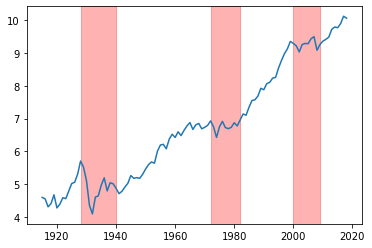

In [3]:
# Remember that we saw a lot more fine-grained details after applying a logarithmic transformation. However,
# since we were trying to showcase periods of economic downturn, let's draw some attention to those periods by
# highlighting them in red.

# So we'll create out log values and the basic plot
log_closings = np.log(closing_values)
plt.plot(years, log_closings)

# Now we'll use axvspan() to add veritical span's across the x axis
plt.axvspan(1928, 1940, color='red', alpha=0.3)
plt.axvspan(1972, 1982, color='red', alpha=0.3)
plt.axvspan(2000, 2009, color='red', alpha=0.3)

# Now, you might notice that the regions we've chosen involves a bit of subjectivity. For instance, the Great
# Depression is generally considered as occuring between 1929-1939, but this doesn't mean that the market was
# falling the entire time. For instance, you can see a significant rebound partway through the 1930s. For the
# purposes of this example however, we've just visually approximated areas where the graph drastically drops
# or tends to flatten. However, if you want to explore this in greater depth, or see how our estimates stack
# up to reality, see the Wikipedia page which lists a complete set of recessions throughout US history:
# (https://en.wikipedia.org/wiki/List_of_recessions_in_the_United_States).

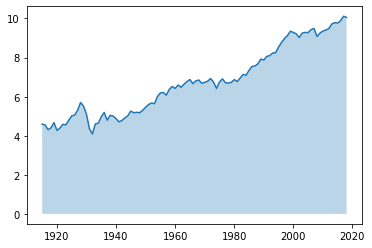

In [4]:
# Marking every single recession might be a bit cluttering. So, let's just come up with a graphic that
# emphasizes the Great Depression, and the recession in 2008. Just to make this visually appealing, let's
# shade the area under the curve using the fill_between function.

plt.plot(years, log_closings)
plt.fill_between(years, log_closings, alpha=0.3)

Matplotlib fill_between Documentation:

https://matplotlib.org/api/_as_gen/matplotlib.pyplot.fill_between.html

Matplotlib Markers:

![markers](assets/markers.png)

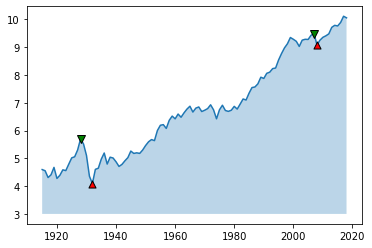

In [5]:
# We might also want to point out the high and low points for each event by placing some markers on the graph.
# As you can see, there are plenty of customization options, and we've seen a couple of these previously.

# Let's grab the coordinates of some of the high data
high_markers = [i for i in range(len(years)) if years[i] in [1928, 2007]]

# Now when we call plot() we can indicate that we want to add markers at the coordinates we grabbed, and we
# can set the color of the face or the edges of the markers as appropriate.
plt.plot(years, log_closings, '-v', markevery=high_markers, 
         markerfacecolor='green', markeredgecolor='black', markersize=8)
# And I'm going to add that fill back in
plt.fill_between(years, log_closings, y2=3, alpha=0.3)

# And now let's do the same thing for the lows
low_years = [1932, 2008]
low_markers = [i for i in range(len(years)) if years[i] in low_years]
plt.scatter(low_years, log_closings[low_markers], s=50, c='r', marker='^', edgecolors='black', zorder=3)

Here are a few links to the documentation for these edits, I think they're all worth a quick read:

https://matplotlib.org/gallery/misc/zorder_demo.html

https://matplotlib.org/examples/color/named_colors.html

https://matplotlib.org/gallery/lines_bars_and_markers/line_styles_reference.html

### Annotation Basics 

Here's a nice table on the coordinate systems available from the matplotlib documentation

| argument | coordinate system |
|:---: |:----:|
|'figure points' | points from the lower left corner of the figure|
|'figure pixels' |	pixels from the lower left corner of the figure|
|'figure fraction' |	0,0 is lower left of figure and 1,1 is upper right|
|'axes points' |	points from lower left corner of axes|
|'axes pixels' |	pixels from lower left corner of axes|
|'axes fraction' |	0,0 is lower left of axes and 1,1 is upper right|
|'data' |	use the axes data coordinate system|

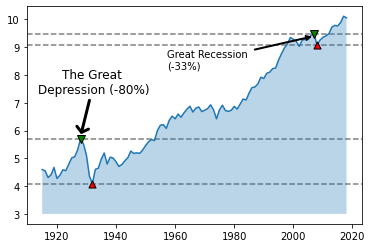

In [6]:
# Ok, let's bring in what we just did as a set of markers. Remember that since we're in the default Jupyter
# matplotlib mode our figure is automatically closed at the end of a cell execution, so I'm going to just copy
# and paste
high_markers = [i for i in range(len(years)) if years[i] in [1928, 2007]]
plt.plot(years, log_closings, '-v', markevery=high_markers, 
         markerfacecolor='green', markeredgecolor='black', markersize=8)
plt.fill_between(years, log_closings, y2=3, alpha=0.3)

low_years = [1932, 2008]
low_markers = [i for i in range(len(years)) if years[i] in low_years]
plt.scatter(low_years, log_closings[low_markers], s=50, c='r', marker='^', edgecolors='black', zorder=3)

# Even though we've placed markers, it'd be nice to explicitly label each event, and also give your audience
# some sense of how big the drop actually is, since it's a bit hard to tell given our logarithmic scale.
# First, let's calculate the percent change for both the depression and recession:

depression_diff = np.exp(log_closings[low_markers[0]]) - np.exp(log_closings[high_markers[0]])
recession_diff = np.exp(log_closings[low_markers[1]]) - np.exp(log_closings[high_markers[1]])
depression_pct = 100 *  depression_diff / np.exp(log_closings[high_markers[0]])
recession_pct = 100 * recession_diff / np.exp(log_closings[high_markers[1]])

# Now we just have to affix some labels and add some arrows. To do so, we'll need to specify the location or
# points where we want to place these objects. To do that, you'll have to first select a coordinate system.
# I've listed a number of them in the table above. While I won't demonstrate every single one, we will go
# through several examples so that you'll gain enough familiarity to annotate plots on your own, and to
# understand the documentation should you need to use a different set of coordinates.

# First up, let's see an example using the axes fraction coordinate system, which puts our origin, point 0,0
# at the lower left of the axes
plt.annotate('The Great \nDepression (%d%%)' % depression_pct, 
             xy=(1928, 5.8), xycoords='data', xytext=(0.2, 0.6), textcoords='axes fraction', 
             fontsize=12, horizontalalignment='center',
             arrowprops=dict(arrowstyle='->, head_width=0.5', color='black', linewidth=3))

# Next, let's add the Great Recession using the axes points coordinate system, which are the number of points
# from the lower left
plt.annotate('Great Recession \n(%d%%)' % recession_pct, 
             xy=(2007, 9.4), xycoords='data', xytext=(140, 155), textcoords='axes points', 
             arrowprops=dict(arrowstyle='->, head_width=0.2', linewidth=2))

# We can also draw some dotted horizontal lines to help you approximate how long it took to recover from each
# economic downturn. We want to layer them behind our markers, which means we'll need to specify a zorder
# value. Higher numbers get moved towards the front, and smaller values are pushed backwards on this "z-axis".
plt.axhline(log_closings[high_markers[0]], color='grey', linestyle='--', zorder=0)
plt.axhline(log_closings[high_markers[1]], color='grey', linestyle='--', zorder=0)
plt.axhline(log_closings[low_markers[0]], color='grey', linestyle='--', zorder=0)
plt.axhline(log_closings[low_markers[1]], color='grey', linestyle='--', zorder=0)

In [ ]:
# Note that the Depression took almost 20 years to recover (or return to the same point value)! By contrast,
# the recession reached pre-crash levels in under 5 years, though that's not to say there weren't lingering
# effects in the years after. Finally, I want to draw your attention to the fact that the percentages aren't
# entirely accurate. For instance, the high, prior to the recession, was roughly 14,000 points, while the low
# hovered around 6,500, a drop of over 50%. The reason is because we only provided yearly data, but
# presumably, we'd get a more accurate representation had you been given monthly data instead.

**Stack Overflow Notes:**

Difference between points and pixels?
https://graphicdesign.stackexchange.com/questions/199/point-vs-pixel-what-is-the-difference

Technicality when using arrows:
https://stackoverflow.com/questions/27598976/matplotlib-unknown-property-headwidth-and-head-width

**Other Info:**

Matplotlib Annotations Tutorial:
https://matplotlib.org/tutorials/text/annotations.html#placing-artist-at-the-anchored-location-of-the-axes

More Documentation:

https://matplotlib.org/api/_as_gen/matplotlib.patches.Patch.html#matplotlib.patches.Patch 

$$\text{Inherited} \Uparrow \text{From}$$ 


https://matplotlib.org/api/_as_gen/matplotlib.patches.FancyArrowPatch.html#matplotlib.patches.FancyArrowPatch

### The Species-Area Relationship

In this next example let's look at a nice historic set of data on plant species diversity from costal
regions and islands.

Johnson, M. P., Mason, L. G., & Raven, P. H. (1968). Ecological parameters and plant species diversity. The
American Naturalist, 102(926), 297-306. https://www.jstor.org/stable/pdf/2459432.pdf

|California Coast| Data Table (Area and # of Native Species) |
|:--------------:|:----------:|
|![California](assets/california.png)|![data](assets/cali_data.png)|



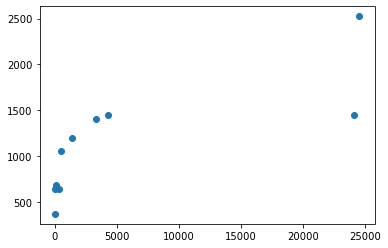

In [7]:
# Now let's move on to a different example. Above, to the right, you'll see a figure of the State of
# California and its surrounding areas. On the left, is a table with various information collected on mainland
# areas and nearby islands. We'll be focusing on two variables in particular: A, which stands for area
# (measured in square miles), and S1, which represents the number of native species in that particuar region.
# Let's go ahead and load our data into two separate dataframes: one for the mainland, and one for the islands
# (not including the island groups).

# Let's create some dataframes for our data
import pandas as pd
island_df = pd.DataFrame({'Location': ['Cedros', 'Guadalupe', 'Santa Cruz', 'Santa Rosa', 
                                       'Santa Catalina', 'San Clemente', 'San Nicolas', 'San Miguel', 
                                       'Natividad', 'Santa Barbara', 'San Martin', 'San Gernoimo', 
                                       'South Farallon', 'Ano Nuevo'], 
                            'Area': [134, 98, 96, 84, 75, 56, 22, 14, 2.8, 1.0, 0.9, 0.2, 0.1, 0.02], 
                            'Species': [205, 163, 420, 340, 392, 235, 120, 190, 42, 40, 62, 4, 12, 40]})

mainland_df = pd.DataFrame({'Location': ['California Coast', 'Baja California', 'San Diego County', 
                                         'Monterey County', 'Marin County', 'Santa Cruz Mountains',
                                         'Santa Monica Mountains', 'Santa Barbara Area', 
                                         'San Francisco', 'Tiburon Peninsula'], 
                          'Area': [24520, 24100, 4260, 3324, 529, 1386, 320, 110, 45, 5.9], 
                          'Species': [2525, 1450, 1450, 1400, 1060, 1200, 640, 680, 640, 370]})

# Now let's build a scatter plot
plt.scatter(mainland_df['Area'], mainland_df['Species'])

In [ ]:
# When we plot the data, it sort of looks like a square root graph, and in general, we get a shape that
# resembles a power model. This interesting ecological observation between the number of species and area is
# known as the species-area relation. So, with that knowledge, let's write down a mathematical model that
# captures this relationship.

Power Model function, more information available at https://en.wikipedia.org/wiki/Power_law

$$ S = cA^z \;\text{where}\; c, z \in \mathbb{R}$$ $$\Downarrow$$ $$ log(S) = log(cA^z)$$ $$\Downarrow$$ $$
log(S) = z \cdot log(A) + log(c) $$

$$y = mx + b$$

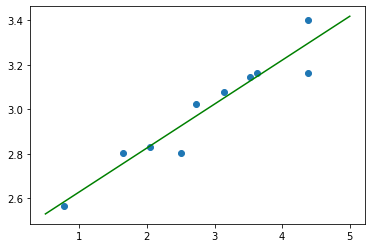

In [8]:
# So, if we transform our variables according to this model, we'll get something that just looks like a line.
# We can use numpy's polyfit function to then find our slope (m) and y-intercept (b), before manipulating
# these values back into our parameters of interest: c and z. Let's start with the mainland:

# So let's build a polyfit line off of the area and species data
mainland_z, mainland_logc = np.polyfit(np.log10(mainland_df['Area']), np.log10(mainland_df['Species']), 1)
# Let's create some evenly spaced x values
x_vals = np.arange(0.5, 5.5, 0.5)
# Let's create a straight line to fit this data
abline_values = [mainland_z * x + mainland_logc for x in x_vals]
# And now let's print the line and the data
plt.scatter(np.log10(mainland_df['Area']), np.log10(mainland_df['Species']))
plt.plot(x_vals, abline_values, 'g')

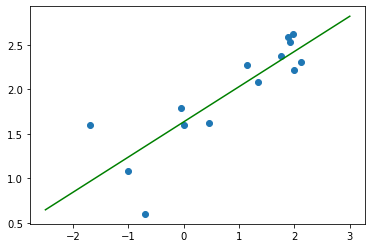

In [9]:
# Now we'll repeat the same process for the island dataframe:

# So we fit a line using np.polyfit
island_z, island_logc = np.polyfit(np.log10(island_df['Area']), np.log10(island_df['Species']), 1)
x_vals = np.arange(-2.5, 3.5, 0.5)
# And now plot that line and the data points
abline_values = [island_z * x + island_logc for x in x_vals]
plt.scatter(np.log10(island_df['Area']), np.log10(island_df['Species']))
plt.plot(x_vals, abline_values, 'g')

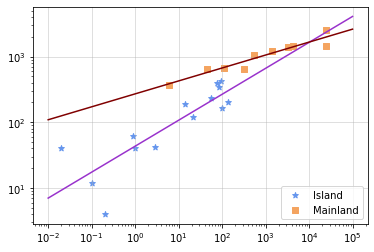

In [10]:
# Ok, looks pretty interesting, but we can't really compare well. We see the two sets of axes have different
# values though for instance the island ranges from -2 to 3 on the x axis, while the mainland is 1 to 5 on the
# x axis, and the y axis values are different too

# Let's plot both the island and mainland data on the same figure, so that we can visually compare the two.
# Also, instead of using log(A) and log(S) for our x and y axes respectively, let's just keep the original
# values and use a log scale on the axes instead, which might make it easier for someone to interpret in this
# case.

island_c = 10 ** island_logc
mainland_c = 10 ** mainland_logc

# Now let's just plot our data as is
plt.scatter(island_df['Area'], island_df['Species'], c='cornflowerblue', marker='*', label='Island')
plt.scatter(mainland_df['Area'], mainland_df['Species'], c='sandybrown', marker='s', label='Mainland')

# And now we're actually going to tell matplotlib that the axis should be scaled. You'll see that matplot lib has
# numerous little nicities like this to allow us to not have to do all of the data scaling and transformation work
# ourselves
plt.yscale('log')
plt.xscale('log')

# I'm going to put those grid lines on as well
plt.grid(True, alpha=0.5)

# Now, to get our new points, we'll use np.logspace to generate a set of x values that are spaced evenly on a log
# scale (base 10), and then calculate our y values using the original equation from before.
x_vals = np.logspace(-2, 5, 50)
abline_island_values = [island_c * x ** island_z for x in x_vals]
abline_mainland_values = [mainland_c * x ** mainland_z for x in x_vals]
plt.plot(x_vals, abline_island_values, color='darkorchid')
plt.plot(x_vals, abline_mainland_values, color='maroon')
plt.legend(loc='lower right')

In [ ]:
# Alright, so that's pretty impressive. A nice looking plot which shows us the difference between the Island and
# Mainland habitate loss. We have a trend line, and we've seen two different ways to scale the same data. Now
# the details of the power law formula might seem a bit intimidating here, and I would encourage you to go back
# and take a look at it, but the purpose of this video actually isn't so much on the power law modeling but instead
# on how to use the toolkit matplotlib to engage in visual exploration of data, and how to apply whatever scaling
# method you might be interested in trying to that data.

While our plot already looks pretty and colorful, let's try to add a bit more analysis and annotation to our
plot to document our findings. For example, we can now answer how the number of native species might change
as a result of decreasing land area. This might happen due to a number of reasons, such as:

- Deforestation due to increasing agricultural use 
- Urbanization as a result of population growth 
- Industrialization, tourism, etc.

Of course, our model is quite crude, but it's still useful to be able to estimate the effect of area on
biodiversity.

Text(10, 10, '50% area loss would result \nin a biodiversity drop of...\n12% on the mainland and \n23% on surrounding islands')

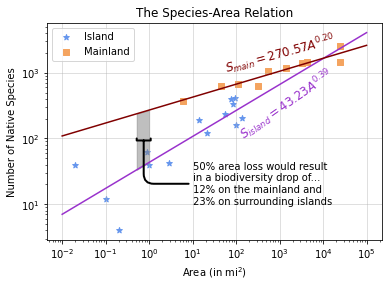

In [11]:
# But, before we move on, let's add some labels so that people know what we're trying to present, and what the
# numbers actually mean. Now remember that we've left the default Jupyter function which closes off figures at the
# end of a cell on. So this means we have to recreate the whole plot. That might seem laborious here, but that's
# because you're watching a video! In practice you'll constantly be editing and rerunning cells instead of 
# creating new ones like this. So let's just copy and paste some code in.
plt.scatter(island_df['Area'], island_df['Species'], c='cornflowerblue', marker='*', label='Island')
plt.scatter(mainland_df['Area'], mainland_df['Species'], c='sandybrown', marker='s', label='Mainland')
plt.yscale('log')
plt.xscale('log')

# I'm going to clean up some titles too. Watch what I do for the x label
plt.title('The Species-Area Relation')
plt.xlabel('Area (in mi$^2$)')

# Odd looking, eh? This is me actually using latex commands to show the value is in miles squared. Latex is
# outside the scope of this lecture, but keep in mind that matplotlib was designed to help scientists communicate
# data results, so there are lots of nice functions in there to do so.

# Now we can plot the y label
plt.ylabel('Number of Native Species')

# And the gridlines
plt.grid(True, alpha=0.5)

# Now I'm going to plot our data.
x_vals = np.logspace(-2, 5, 50)
abline_island_values = [island_c * x ** island_z for x in x_vals]
abline_mainland_values = [mainland_c * x ** mainland_z for x in x_vals]
plt.plot(x_vals, abline_island_values, color='darkorchid')
plt.plot(x_vals, abline_mainland_values, color='maroon')

# And I didn't actually calculate the intersection of the lines - I'll leave that as an exercise if you're 
# interested - but it would seem pretty reasonable to use fill_between to show the area difference
plt.fill_between(x_vals[12:15], abline_island_values[12:15], abline_mainland_values[12:15], 
                 color='grey', alpha=0.5) #indicies obtained via inspection
plt.legend(loc='upper left')

# And now I'm going to annotate the chart some more. Here's I'm using a mixture of Latex and Python. The python
# values are after the % sign -- this is one way to format strings -- while the latex is hinted at because of the
# dollar sign at the beginning and end of the string, and lets the scientific notation shine through
plt.annotate('$S_{island} = %(c).2f A^{%(z).2f}$' % {'c': island_c, 'z': island_z}, 
             xy=(100, 100), xycoords='data', color='darkorchid', fontsize=12, rotation=35) #counterclockwise

# You'll notice also that I've rotated the annotation -- it took a bit of playing around with this to find the
# right size and rotation I wanted!

# We can do this fo rthe mainland too
plt.annotate('$S_{main} = %(c).2f A^{%(z).2f}$' % {'c': mainland_c, 'z': mainland_z}, 
             xy=(50, 1000), xycoords='data', color='maroon', fontsize=12, rotation=15)

# Now, let's calculate the percent loss in the number of species, if we were to cut the areas in half.
island_loss = 100 * (island_c * 1.0 ** island_z - island_c * 0.5 ** island_z) / (island_c * 1.0 ** island_z)
mainland_loss = 100 * (mainland_c * 1.0 ** mainland_z - mainland_c * 0.5 ** mainland_z) / (mainland_c * 1.0 ** mainland_z)

# And now I'm going to add a string message to the figure as well
message = '50% area loss would result \nin a biodiversity drop of...' + \
          '\n%(main)d%% on the mainland and \n%(island)d%% on surrounding islands' % \
          {'main': mainland_loss, 'island': island_loss}

# I'm going to make a call-out to this message and drop it on our plot as well
plt.annotate(message, xy=(0.75, 100), xycoords='data', xytext=(10, 10), textcoords='data', 
             arrowprops=dict(arrowstyle='-[, widthB=0.7', linewidth=2, 
                             connectionstyle = "angle,angleA=0,angleB=90,rad=10"))

Here are a few reference materials to help you, especially if you are interested in the original research
behind this or how to embed mathematical equations in your figures.

Reference: http://math.hws.edu/~mitchell/SpeciesArea/speciesAreaText.html

Writing Mathematical Expressions: https://matplotlib.org/users/mathtext.html

LaTeX "Cheat Sheet": https://www.nyu.edu/projects/beber/files/Chang_LaTeX_sheet.pdf

Make your own comics:
![comic](assets/xkcd.png)

Link to more comics:
https://xkcd.com/2048/

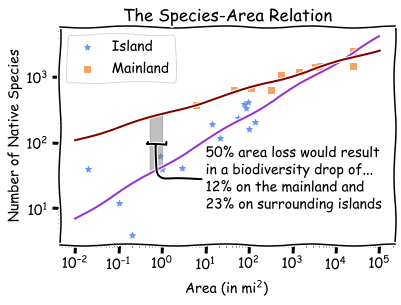

In [12]:
# I want to show you a neat little easter egg before we wrap-up this lecture. You can make your own XKCD-style
# plots simply by wrapping your plotting code with the line shown below. Essentially it indicates that for the
# context of using pyplot, we should use the xkcd formatting filter. It's not really important, but it is a
# little fun :)

# The next two lines are a patch just to make sure the fonts are installed correctly on the Coursera system
import matplotlib
matplotlib.font_manager._rebuild()

with plt.xkcd():
    plt.scatter(island_df['Area'], island_df['Species'], c='cornflowerblue', marker='*', label='Island')
    plt.scatter(mainland_df['Area'], mainland_df['Species'], c='sandybrown', marker='s', label='Mainland')
    plt.yscale('log')
    plt.xscale('log')
    plt.title('The Species-Area Relation')
    plt.xlabel('Area (in mi$^2$)')
    plt.ylabel('Number of Native Species')

    x_vals = np.logspace(-2, 5, 50)
    abline_island_values = [island_c * x ** island_z for x in x_vals]
    abline_mainland_values = [mainland_c * x ** mainland_z for x in x_vals]
    plt.plot(x_vals, abline_island_values, color='darkorchid')
    plt.plot(x_vals, abline_mainland_values, color='maroon')
    plt.fill_between(x_vals[12:15], abline_island_values[12:15], abline_mainland_values[12:15], color='grey', alpha=0.5)
    plt.legend(loc='upper left')

    message = '50% area loss would result \nin a biodiversity drop of...\n12% on the mainland and \n23% on surrounding islands'
    plt.annotate(message, xy=(0.75, 100), xycoords='data', xytext=(10, 10), textcoords='data', 
                 arrowprops=dict(arrowstyle='-[, widthB=0.7', linewidth=2, connectionstyle = "angle,angleA=0,angleB=90,rad=10"))
    
# While this style might not be appropriate in all situations, it's definitely a fun addition; feel free to
# design your own infographics or data-science comics!